In [ ]:
# James Mackey
# Generative AI
# Submission Date: September 26, 2024
# //*** Assignment 2 Problem 1:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, utils, datasets
#from notebooks.utils import display


In [ ]:
#@title 0. Parameters
NUM_CLASSES = 10

In [ ]:
#@title 1. Prepare the Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)
display(x_train[:10])
print(y_train[:10])

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
#@title 2. Build the Model
# Function to create MLP model
# The input layer
# This is the shape of the CIFAR-10 images (32x32 pixels with 3 color channels)

def create_mlp_model(input_shape, num_classes):
    model = models.Sequential()
    #Pass the shape of the input instead of the KerasTensor
    model.add(layers.Flatten(input_shape=input_shape))
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(NUM_CLASSES, activation="softmax"))
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer="adam",
        metrics=["accuracy"]
    )
    return model

def create_cnn_model(input_shape):
  # Create an Input layer with the specified shape
  input_layer = layers.Input(input_shape)

  # First Conv2D layer
  x = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same")(input_layer)
  x = layers.BatchNormalization()(x)
  x = layers.LeakyReLU()(x)

  # Second Conv2D layer with stride 2
  x = layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same")(x)
  x = layers.BatchNormalization()(x)
  x = layers.LeakyReLU()(x)

  # Third Conv2D layer
  x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(x)
  x = layers.BatchNormalization()(x)
  x = layers.LeakyReLU()(x)

  # Fourth Conv2D layer with stride 2
  x = layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x)
  x = layers.BatchNormalization()(x)
  x = layers.LeakyReLU()(x)

  # Flatten layer
  x = layers.Flatten()(x)

  # Fully connected layer
  x = layers.Dense(128)(x)
  x = layers.BatchNormalization()(x)
  x = layers.LeakyReLU()(x)
  x = layers.Dropout(0.5)(x)

  # Output layer
  output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

  # Create and compile model
  model = models.Model(input_layer, output_layer)
  model.compile(
      loss="categorical_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )
  return model

#Pass the shape of the image to create_mlp_model
model1 = create_mlp_model((32, 32, 3), NUM_CLASSES)
#Pass the shape of the image to create_cnn_model
model2 = create_cnn_model((32, 32, 3))


model1.summary()
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1573376   
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_6 (Bat  (None, 128)              

In [ ]:
#@title 3.Train the Model
opt = optimizers.Adam(learning_rate=0.0002)
print("MLP model")
model1.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)
history_mlp= model1.fit(x_train, y_train, epochs=10, validation_split=0.2)
print("CNN model")
# Create a new optimizer instance for model2
opt2 = optimizers.Adam(learning_rate=0.0005)
model2.compile(
    loss="categorical_crossentropy", optimizer=opt2, metrics=["accuracy"]
)
history_cnn= model2.fit(x_train, y_train, epochs=10, validation_split=0.2)

MLP model
Epoch 1/10
1250/1250 [==============================] - 11s 8ms/step - loss: 2.4567 - accuracy: 0.1760 - val_loss: 1.9553 - val_accuracy: 0.2975
Epoch 2/10
1250/1250 [==============================] - 9s 7ms/step - loss: 2.0872 - accuracy: 0.2503 - val_loss: 1.8575 - val_accuracy: 0.3366
Epoch 3/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.9529 - accuracy: 0.2911 - val_loss: 1.7914 - val_accuracy: 0.3444
Epoch 4/10
1250/1250 [==============================] - 9s 8ms/step - loss: 1.8687 - accuracy: 0.3212 - val_loss: 1.7144 - val_accuracy: 0.3941
Epoch 5/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.8129 - accuracy: 0.3452 - val_loss: 1.6940 - val_accuracy: 0.3970
Epoch 6/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.7662 - accuracy: 0.3653 - val_loss: 1.6381 - val_accuracy: 0.4227
Epoch 7/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.7409 - accuracy: 0.3742 - val_loss: 1.6381 - va

313/313 [==============================] - 1s 2ms/step
MLP model
313/313 [==============================] - 2s 5ms/step
CNN model


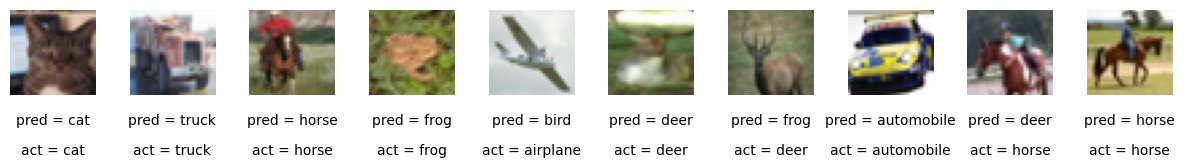

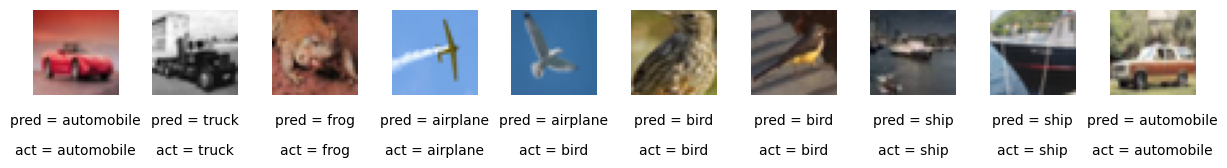

In [ ]:
#@title 4. Evaluation
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)
#MLP model
model1.evaluate(x_test, y_test)
preds = model1.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
print("MLP model")
for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)
#CNN Model
model2.evaluate(x_test, y_test)
preds2 = model2.predict(x_test)
preds_single2 = CLASSES[np.argmax(preds2, axis=-1)]
actual_single2 = CLASSES[np.argmax(y_test, axis=-1)]

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
print("CNN model")
for i, idx in enumerate(indices):
    img2 = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single2[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single2[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img2)



# Plotting


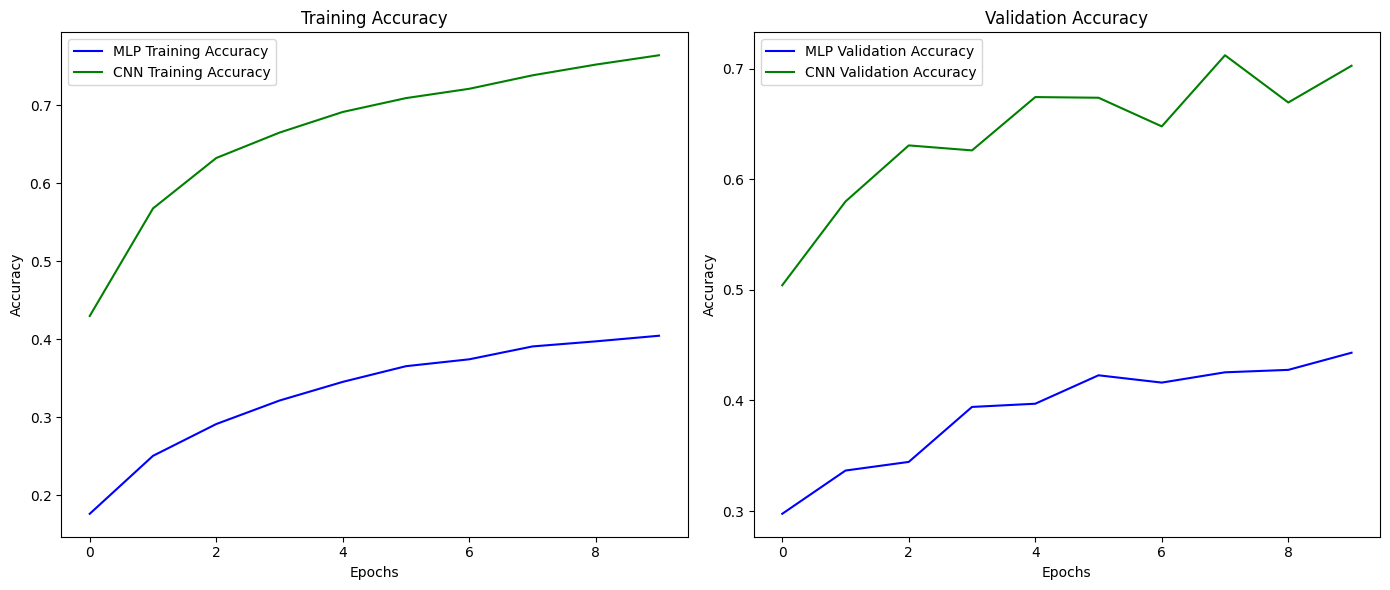

In [ ]:


# Function to plot accuracy and validation accuracy
def plot_training_history(history_mlp, history_cnn):
    # Extract training and validation accuracy from the history objects
    mlp_train_acc = history_mlp.history['accuracy']
    mlp_val_acc = history_mlp.history['val_accuracy']

    cnn_train_acc = history_cnn.history['accuracy']
    cnn_val_acc = history_cnn.history['val_accuracy']

    # Plot training accuracy for both models
    plt.figure(figsize=(14, 6))

    # Training Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(mlp_train_acc, label='MLP Training Accuracy', color='blue')
    plt.plot(cnn_train_acc, label='CNN Training Accuracy', color='green')
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(mlp_val_acc, label='MLP Validation Accuracy', color='blue')
    plt.plot(cnn_val_acc, label='CNN Validation Accuracy', color='green')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Show the plots
    plt.tight_layout()
    plt.show()

# Call the function to plot the training and validation accuracy
plot_training_history(history_mlp, history_cnn)
